In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/My\ Drive/output/ /content/

In [0]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
files = glob.glob('output/*')

In [3]:
outputs = []
for f in files:
    with open(f) as open_f:
        outputs.append(json.load(open_f))

print(len(outputs))

120


In [4]:
people_id = 0
keypoints_lst = []

for o in outputs:
    keypoints_lst.append(o['people'][people_id]['pose_keypoints_2d'])

keypoints_lst = np.array(keypoints_lst)
print(keypoints_lst.shape)

(120, 75)


In [0]:
def convert(keypoints):
    x = []
    y = []
    c = []
    
    for i in range(0, len(keypoints), 3):
        x.append(keypoints[i])
        y.append(keypoints[i + 1] * -1)
        c.append(keypoints[i + 2])
    
    x = np.array(x)
    y = np.array(y)
    c = np.array(c)

    zero_idx = np.where(c == 0, True, False)
    x[zero_idx] = None
    y[zero_idx] = None

    return x, y

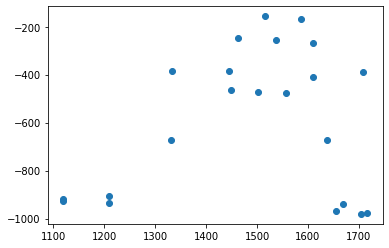

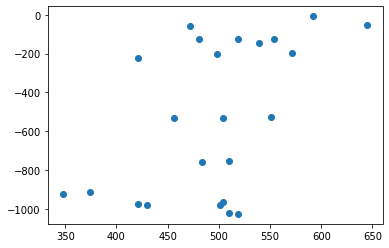

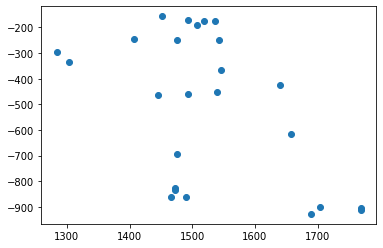

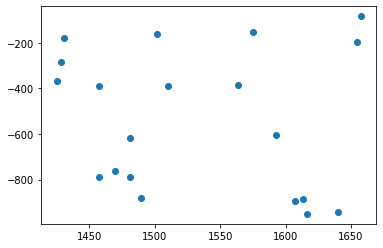

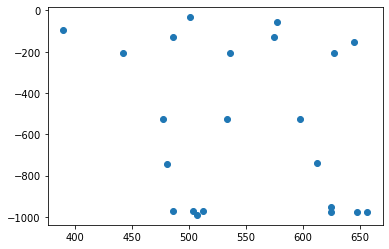

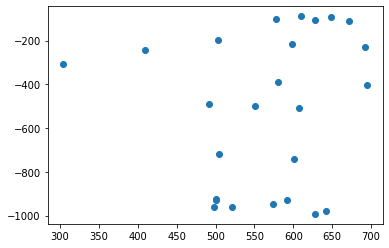

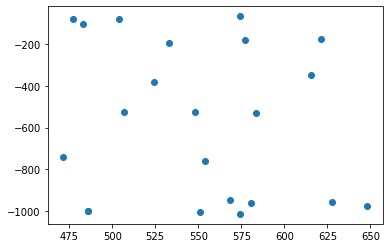

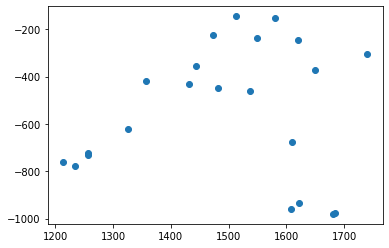

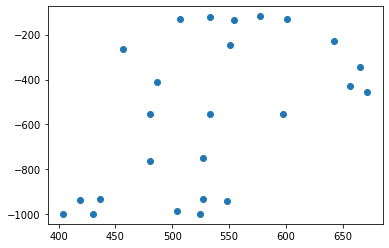

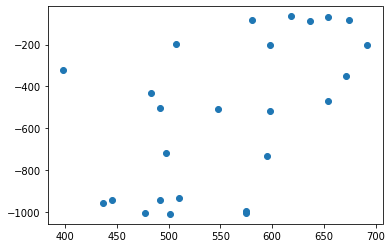

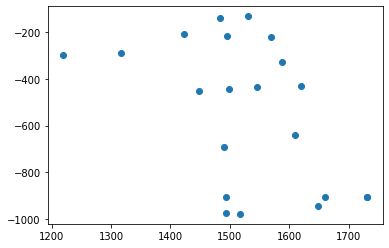

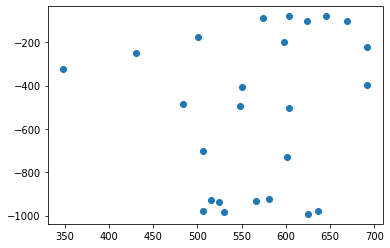

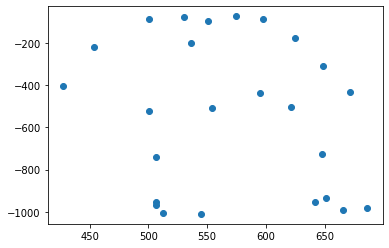

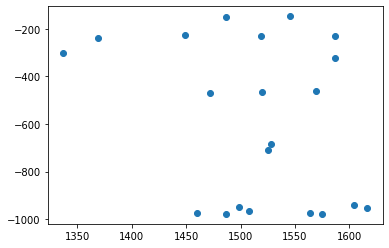

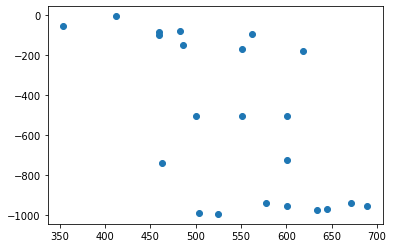

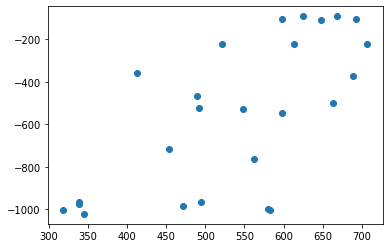

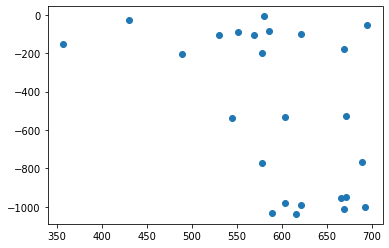

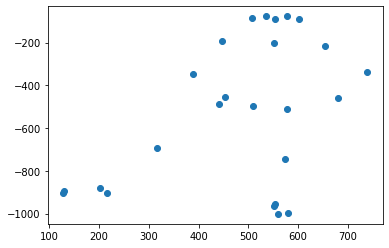

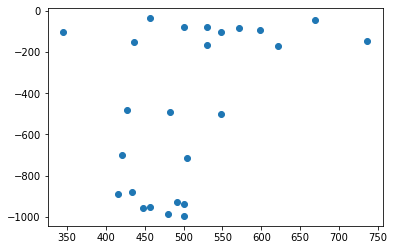

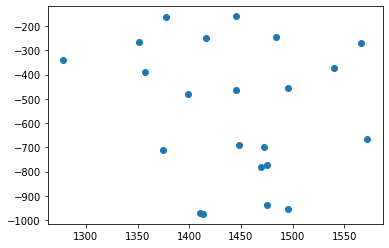

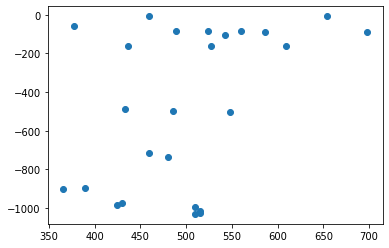

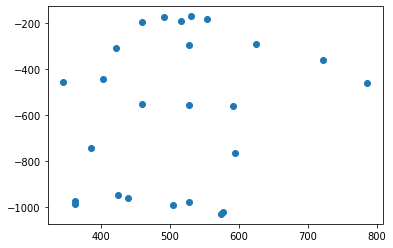

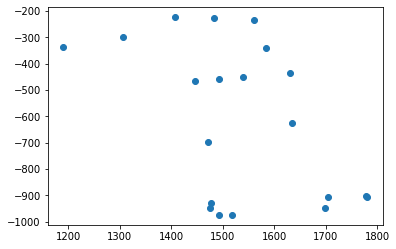

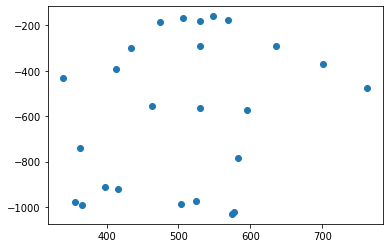

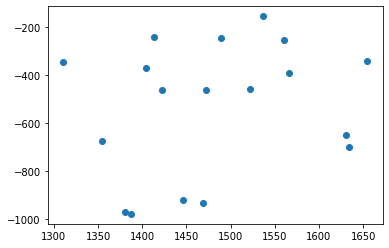

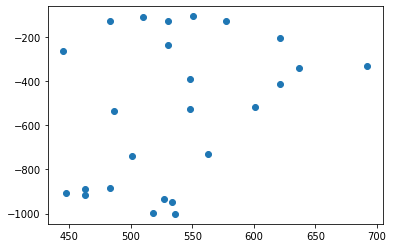

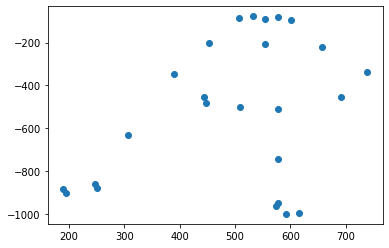

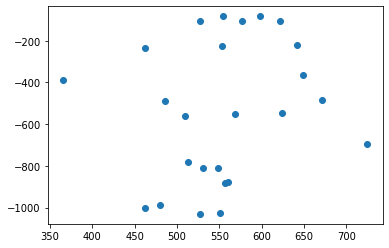

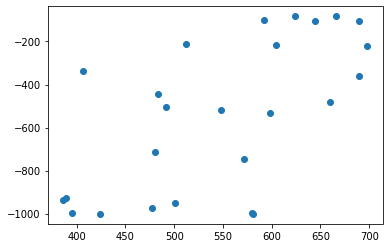

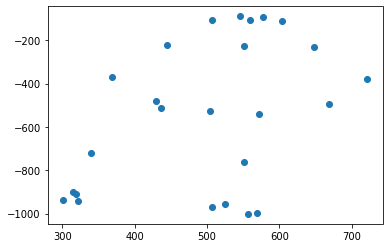

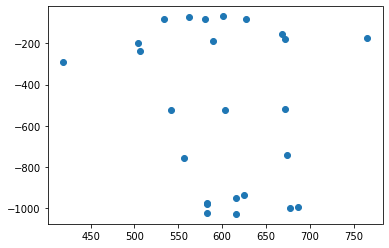

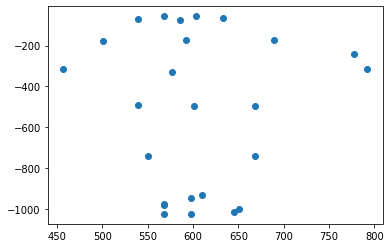

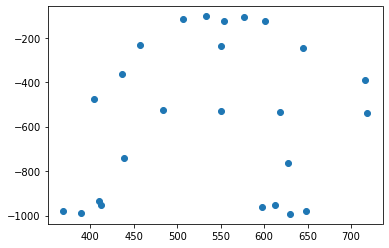

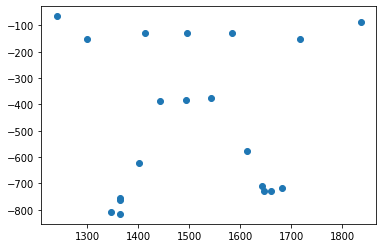

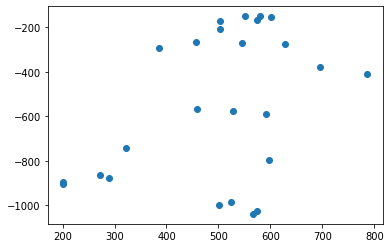

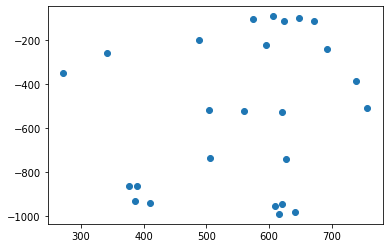

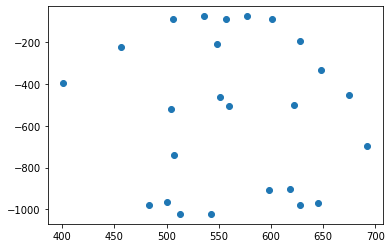

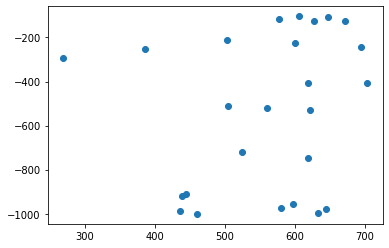

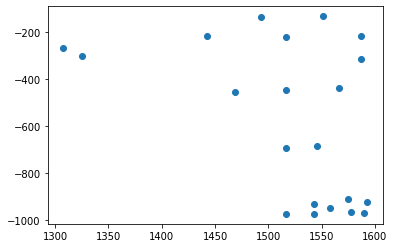

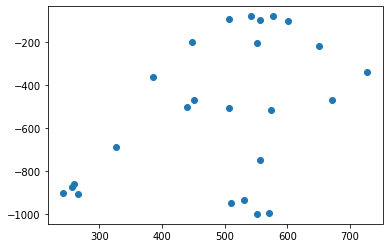

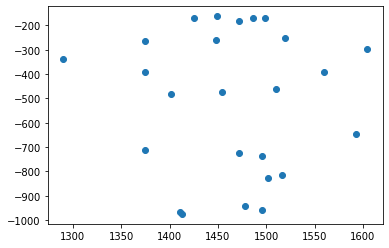

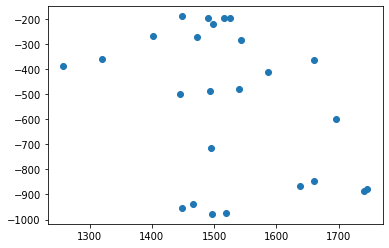

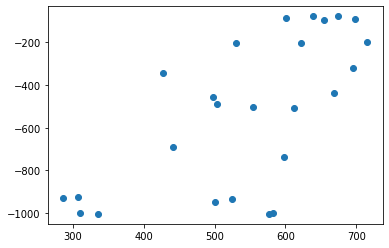

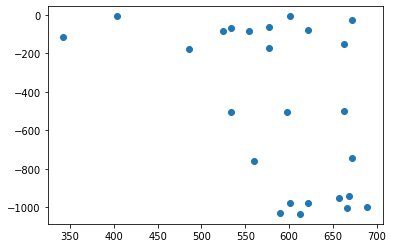

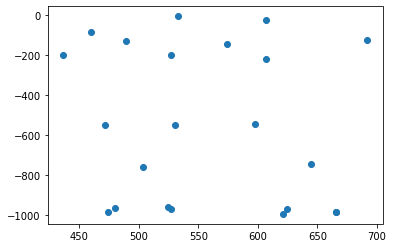

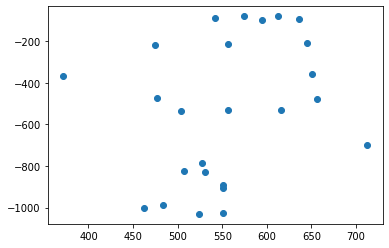

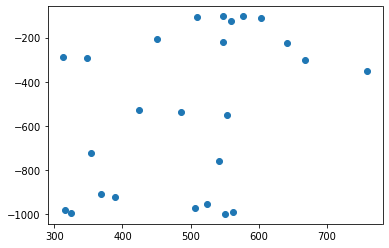

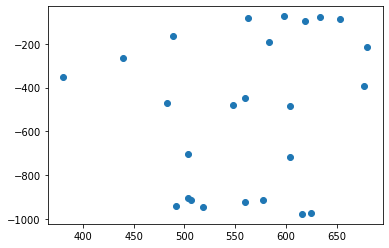

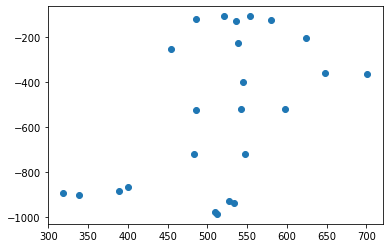

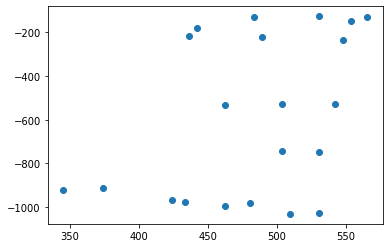

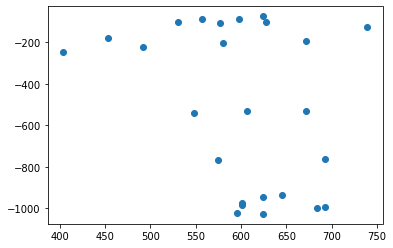

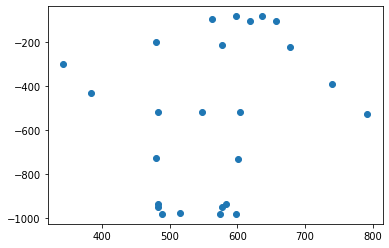

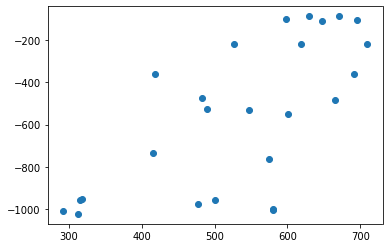

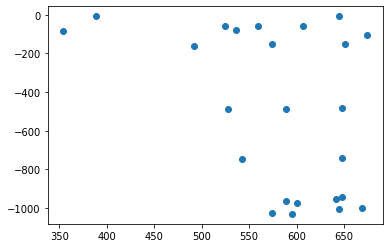

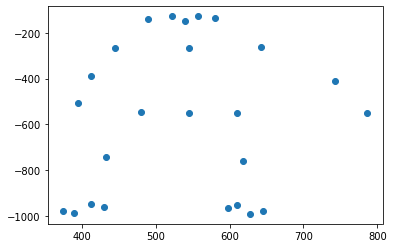

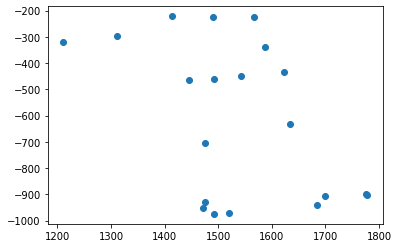

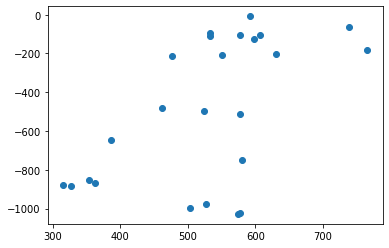

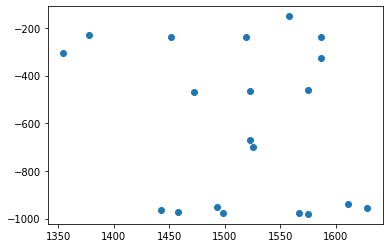

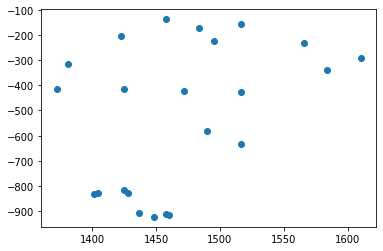

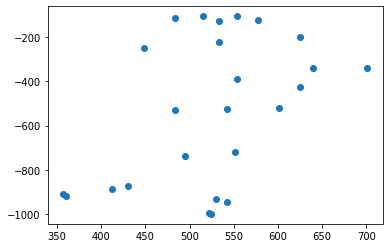

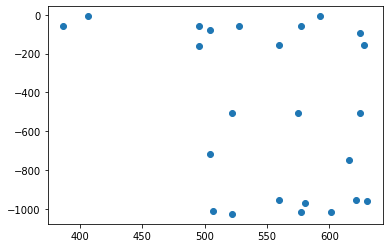

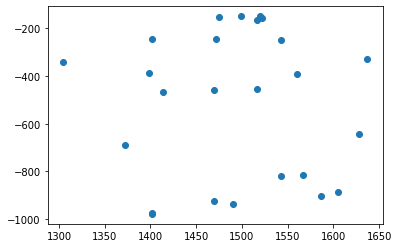

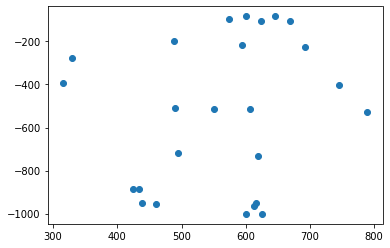

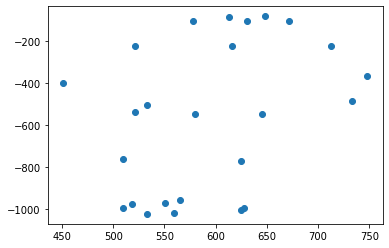

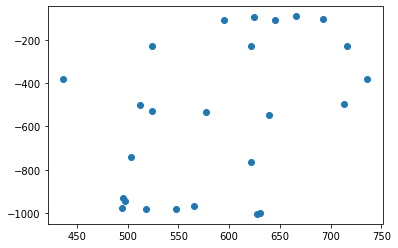

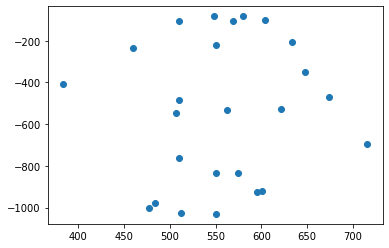

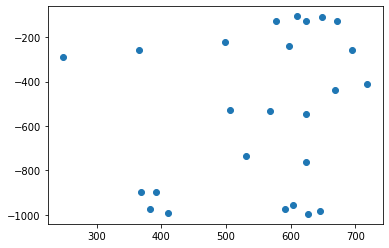

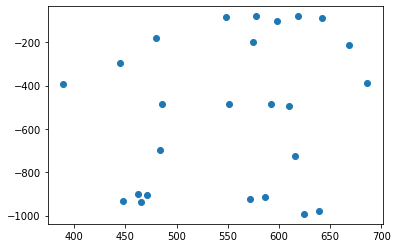

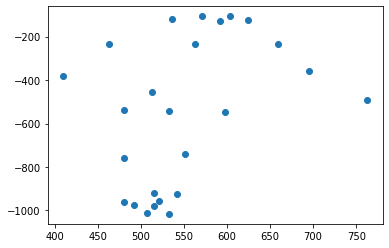

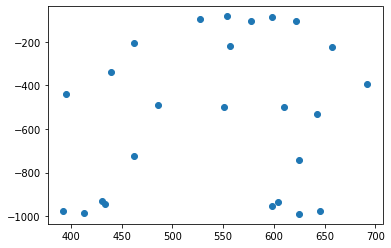

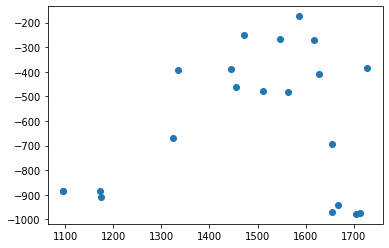

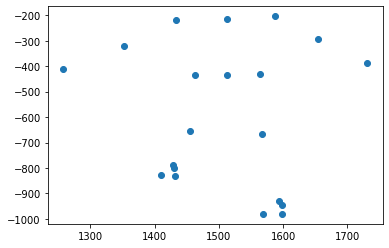

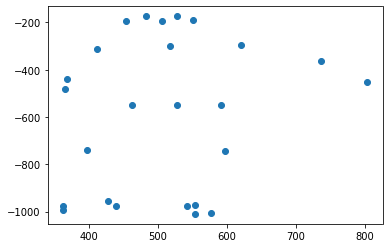

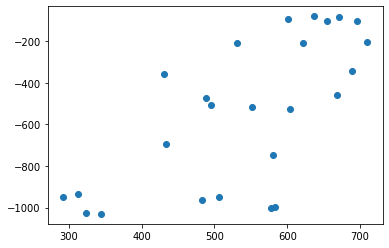

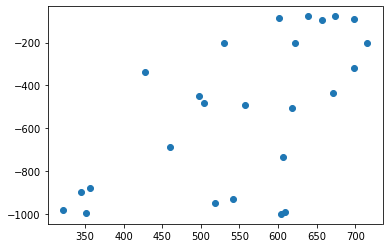

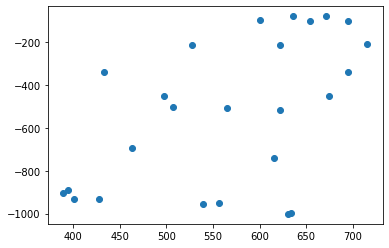

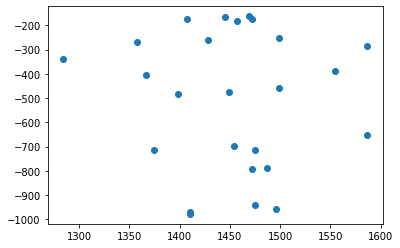

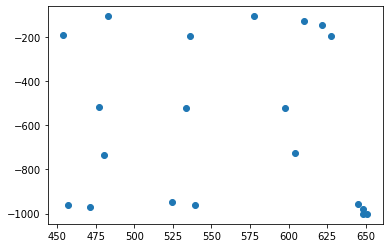

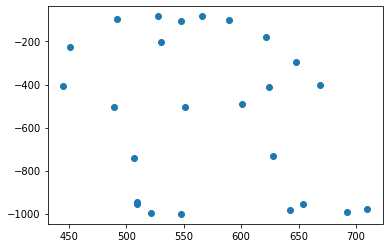

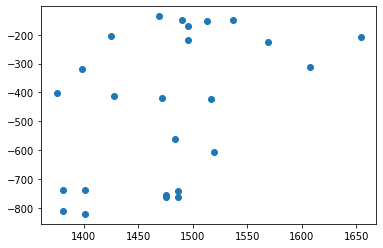

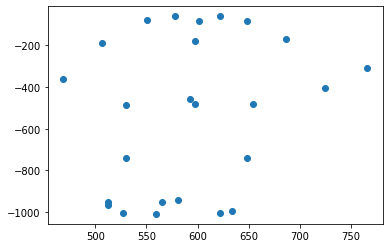

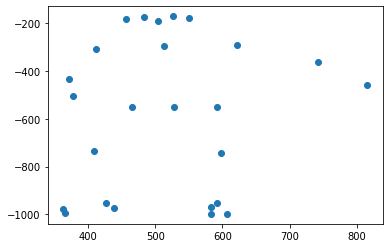

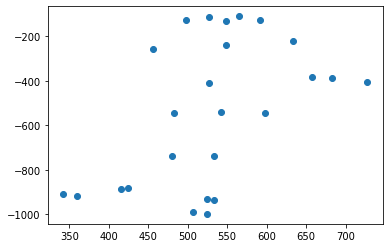

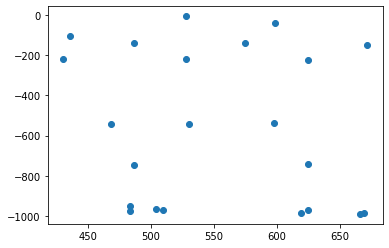

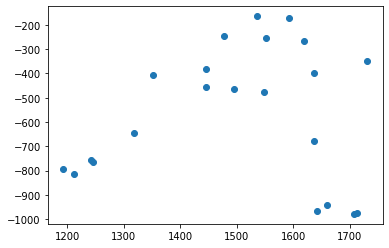

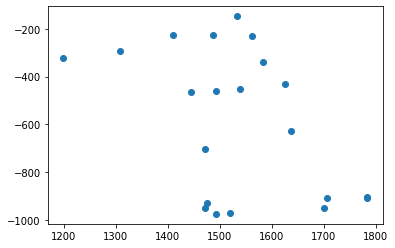

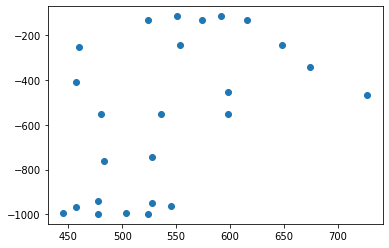

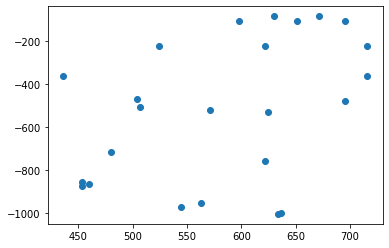

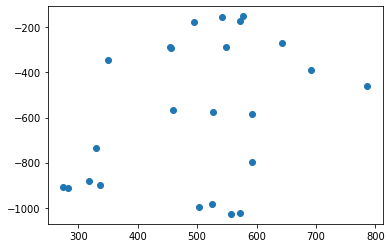

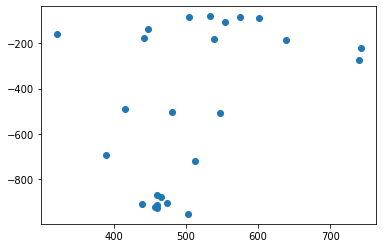

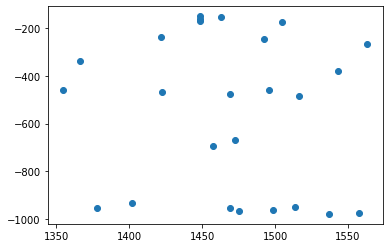

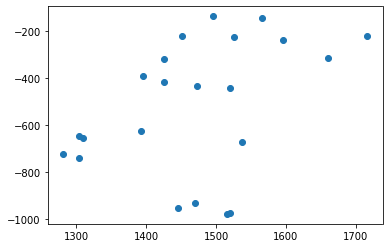

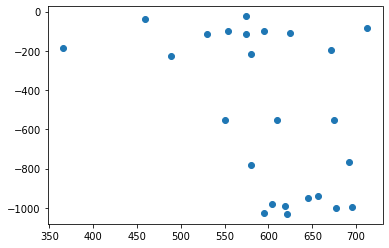

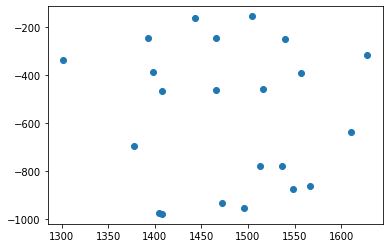

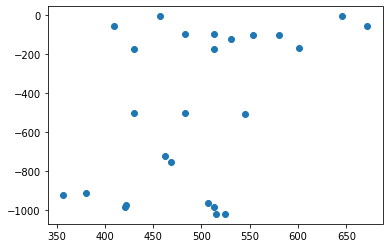

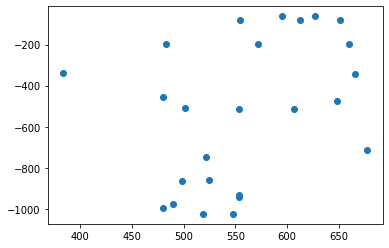

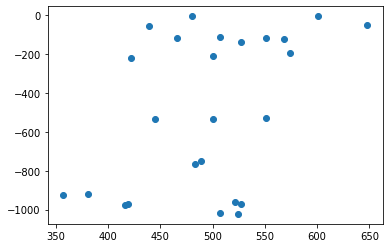

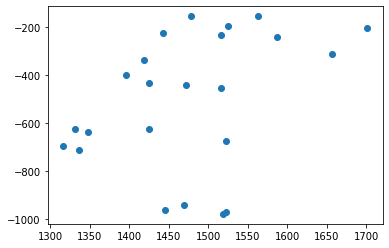

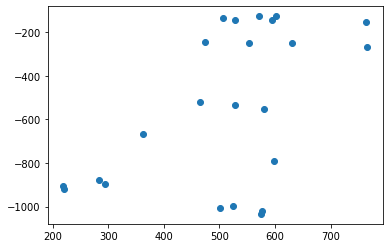

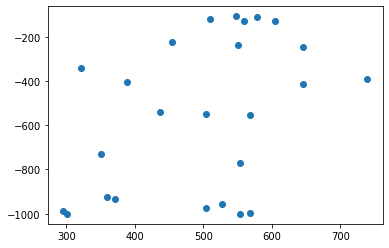

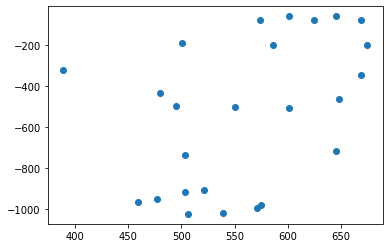

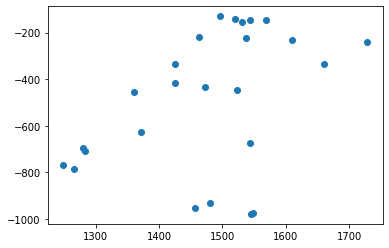

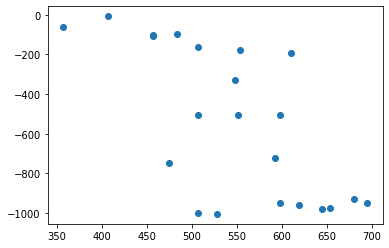

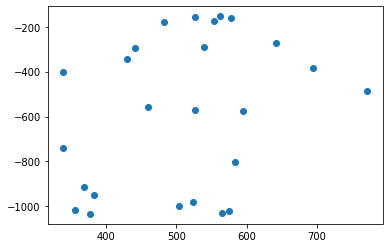

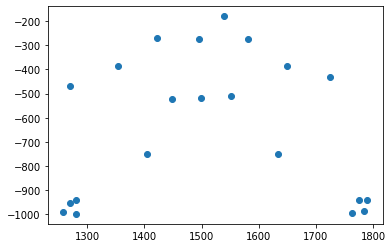

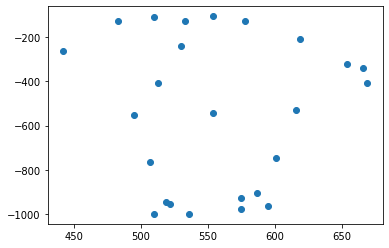

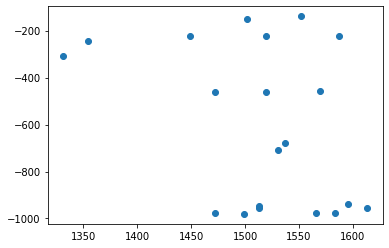

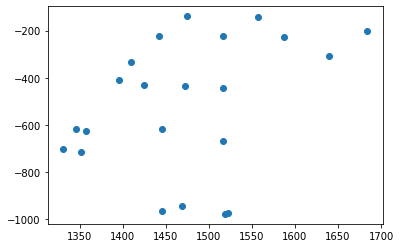

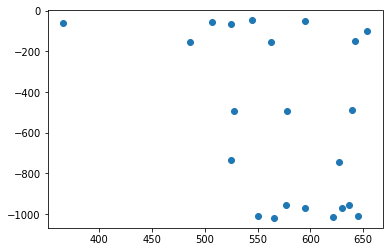

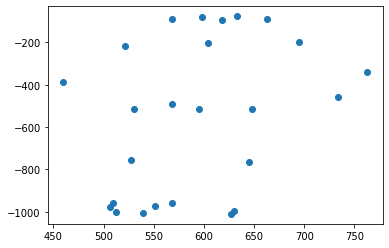

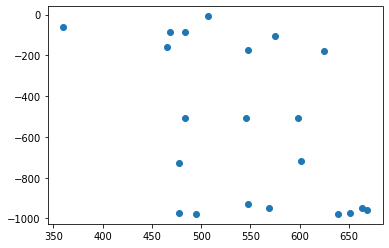

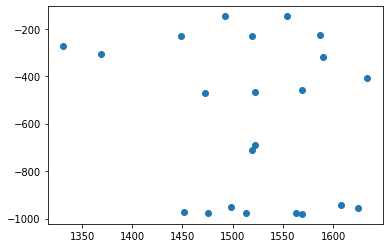

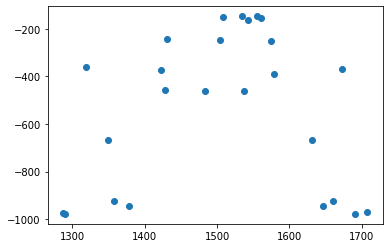

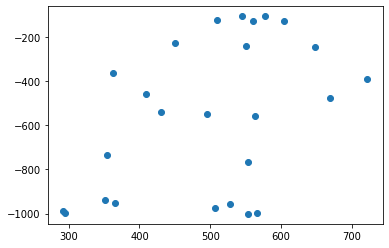

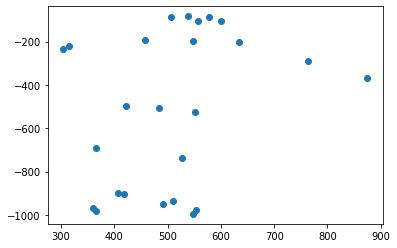

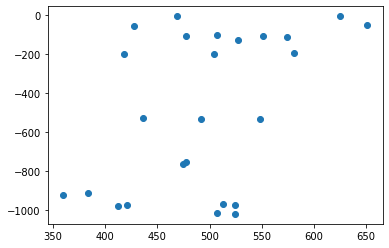

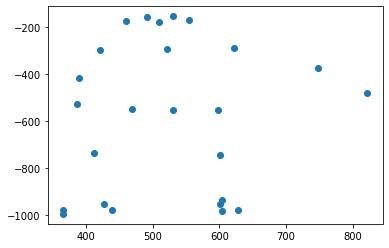

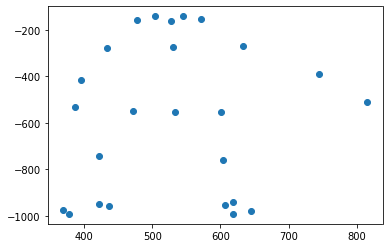

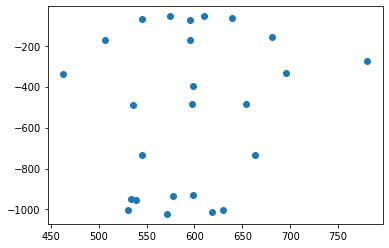

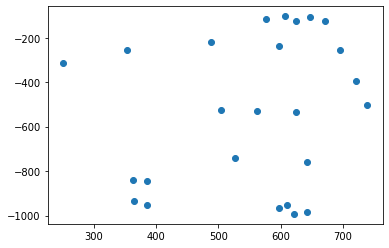

In [68]:
for keypoints in keypoints_lst:
    x, y = convert(keypoints)
    plt.scatter(x, y)
    plt.show()

In [8]:
x_lst = []
y_lst = []
for keypoints in keypoints_lst:
    x, y = convert(keypoints)
    x_lst.append(x)
    y_lst.append(y)
x_lst = np.array(x_lst).T
y_lst = np.array(y_lst).T
print(x_lst.shape)

(25, 120)


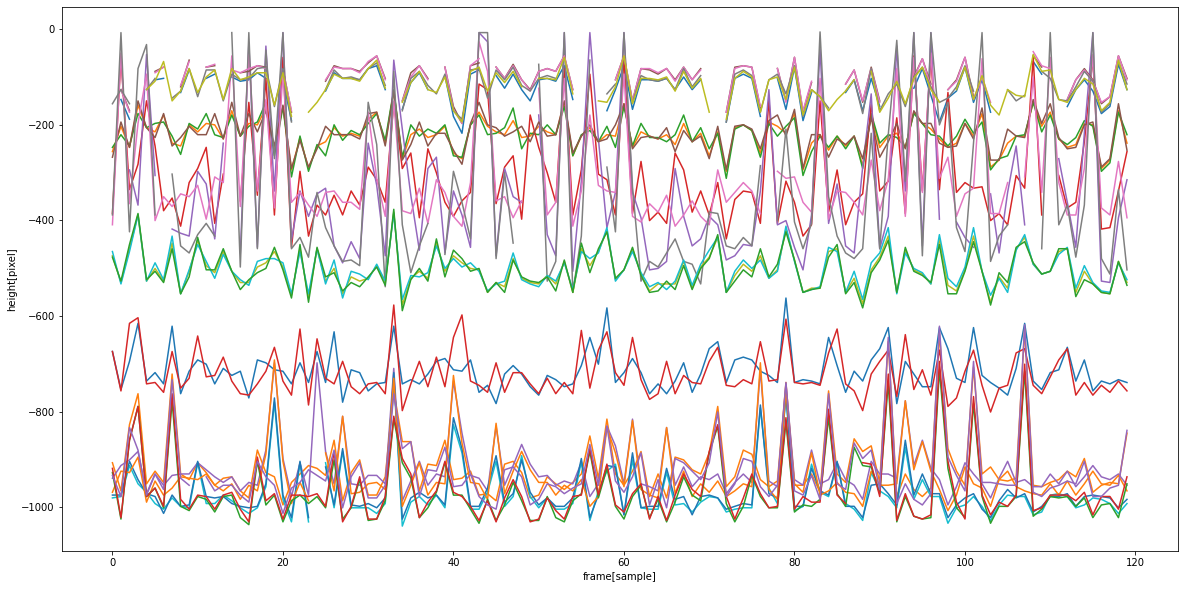

In [21]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('frame[sample]')
ax.set_ylabel('height[pixel]')
for y in y_lst:
    ax.plot(y)

fig.savefig('right.jpg')